In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [44]:
from fastai.metrics import *
from fastai.basics import *
from fastai.vision import *
from pathlib import Path
from IPython.display import FileLink

In [4]:
PATH = "/home/paperspace/classifier_data"

In [12]:
! ls /home/paperspace/classifier_data/train/

art  clothing  furniture  jewelry


In [14]:
data = ImageDataBunch.from_folder(
    Path(PATH)/'train', 
    valid_pct=0.2, 
    bs=64, 
    size=224, 
    ds_tfms=get_transforms()).normalize(imagenet_stats)

In [15]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/home/paperspace/anaconda3/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [16]:
data.c

4

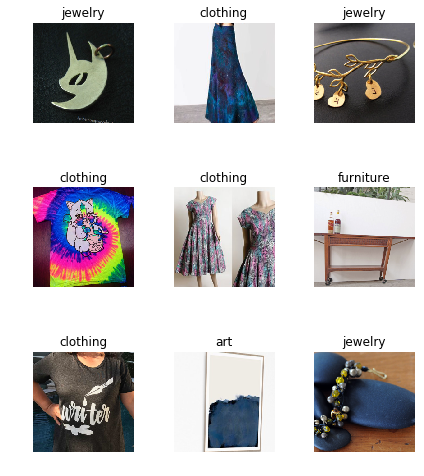

In [17]:
data.show_batch(rows=3, figsize=(6,7))

In [18]:
data.classes

['art', 'clothing', 'furniture', 'jewelry']

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


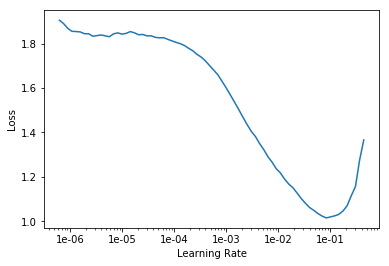

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.957440,0.216612,0.924471,00:15
1,0.524408,0.167256,0.957704,00:15
2,0.340942,0.165404,0.963746,00:14
3,0.247627,0.166461,0.960725,00:15


In [23]:
learn.save('product-stage-1')

In [24]:
learn.load('product-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1324 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jewelry,jewelry,jewelry,jewelry,jewelry
Path: /home/paperspace/classifier_data/train;

Valid: LabelList (331 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
furniture,clothing,jewelry,clothing,art
Path: /home/paperspace/classifier_data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


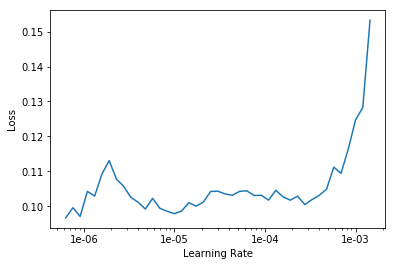

In [27]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(4, slice(3e-5, (3e-3)/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.103093,0.145030,0.957704,00:18
1,0.110307,0.213073,0.927492,00:19
2,0.101435,0.166166,0.963746,00:19
3,0.075749,0.158711,0.963746,00:18


In [33]:
learn.save('product-stage-2', return_path=True)

PosixPath('/home/paperspace/classifier_data/train/models/product-stage-2.pth')

In [34]:
learn.load('product-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1324 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jewelry,jewelry,jewelry,jewelry,jewelry
Path: /home/paperspace/classifier_data/train;

Valid: LabelList (331 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
furniture,clothing,jewelry,clothing,art
Path: /home/paperspace/classifier_data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [35]:
# learn.fit(1, slice(3e-5, (3e-3)/5))

In [36]:
learn.fit_one_cycle(4, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.060626,0.158524,0.960725,00:19
1,0.048056,0.145849,0.960725,00:18
2,0.035050,0.145287,0.957704,00:18
3,0.029667,0.145088,0.963746,00:19


In [37]:
interp = ClassificationInterpretation.from_learner(learn)

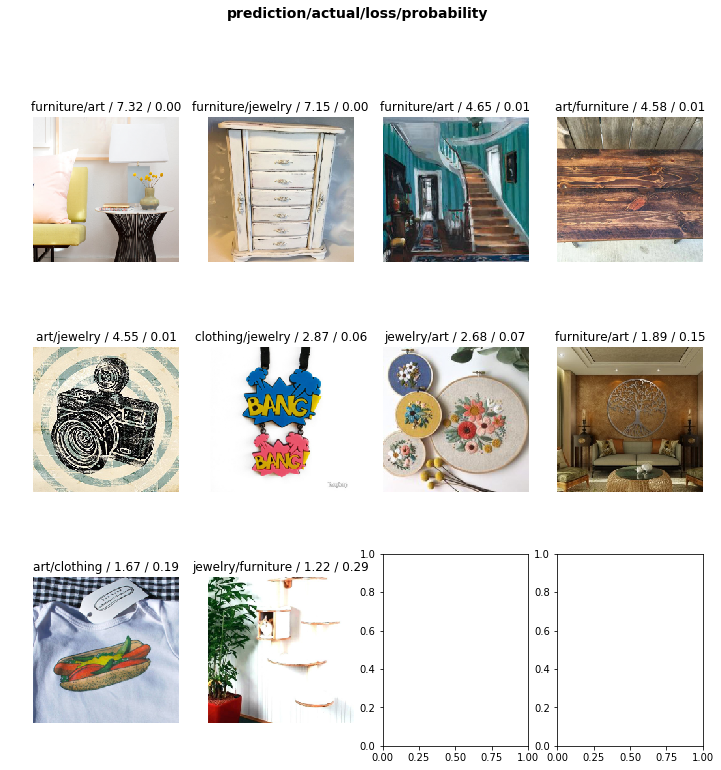

In [39]:
interp.plot_top_losses(10, heatmap=False)

In [40]:
interp.most_confused()

[('art', 'furniture', 3),
 ('jewelry', 'art', 2),
 ('jewelry', 'clothing', 2),
 ('art', 'jewelry', 1),
 ('clothing', 'art', 1),
 ('furniture', 'art', 1),
 ('furniture', 'jewelry', 1),
 ('jewelry', 'furniture', 1)]

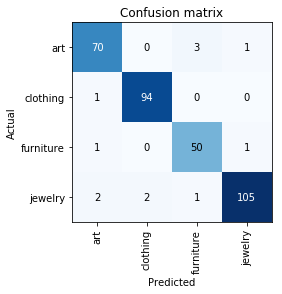

In [41]:
interp.plot_confusion_matrix()

In [45]:
FileLink('/home/paperspace/classifier_data/train/models/product-stage-2.pth')

/home/paperspace/classifier_data/train/models/product-stage-2.pth

In [55]:
learn.export('/home/paperspace/product_classifier.pkl')

In [56]:
FileLink('/home/paperspace/product_classifier.pkl')

/home/paperspace/product_classifier.pkl